# Data@ANZ Virtual Experience Program

## Task 2: Predictive Analysis
Explore correlations between customer attributes, build a regression and a decision-tree prediction model based on your findings.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_excel("/content/ANZ synthesised transaction dataset.xlsx")
data.head

<bound method NDFrame.head of            status  card_present_flag bpay_biller_code         account  \
0      authorized                1.0              NaN  ACC-1598451071   
1      authorized                0.0              NaN  ACC-1598451071   
2      authorized                1.0              NaN  ACC-1222300524   
3      authorized                1.0              NaN  ACC-1037050564   
4      authorized                1.0              NaN  ACC-1598451071   
...           ...                ...              ...             ...   
12038  authorized                0.0              NaN  ACC-3021093232   
12039  authorized                1.0              NaN  ACC-1608363396   
12040  authorized                1.0              NaN  ACC-3827517394   
12041  authorized                1.0              NaN  ACC-2920611728   
12042  authorized                1.0              NaN  ACC-1443681913   

      currency       long_lat txn_description  \
0          AUD  153.41 -27.95             PO

In [5]:
data.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [6]:
# Dropping irrelevent features 
data=data[["txn_description","balance","age","amount","customer_id"]]
data.head()

,txn_description,balance,age,amount,customer_id
0,POS,35.39,26,16.25,CUS-2487424745
1,SALES-POS,21.20,26,14.19,CUS-2487424745
2,POS,5.71,38,6.42,CUS-2142601169
3,SALES-POS,2117.22,40,40.90,CUS-1614226872
4,SALES-POS,17.95,26,3.25,CUS-2487424745


In [7]:
# Getting unique customer data 
cust_data= data.groupby(["customer_id"]).mean().reset_index()
cust_data.head()

,customer_id,balance,age,amount
0,CUS-1005756958,2275.852055,53.0,222.862603
1,CUS-1117979751,9829.929000,21.0,339.843700
2,CUS-1140341822,5699.212250,28.0,212.632500
3,CUS-1147642491,9032.841186,34.0,245.600169
4,CUS-1196156254,22272.433755,34.0,147.145796


In [8]:
# Salary for each customer 
cust_salary=data[data["txn_description"]=="PAY/SALARY"].groupby("customer_id").mean().reset_index()
cust_salary=cust_salary[["customer_id","amount"]]
cust_salary=cust_salary.rename(columns = {'amount':'salary'})
cust_salary['Annual_Salary'] = cust_salary['salary']*12
cust_salary.head()

,customer_id,salary,Annual_Salary
0,CUS-1005756958,970.47,11645.64
1,CUS-1117979751,3578.65,42943.80
2,CUS-1140341822,1916.51,22998.12
3,CUS-1147642491,1711.39,20536.68
4,CUS-1196156254,3903.73,46844.76


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2349ff0d0>]],
      dtype=object)

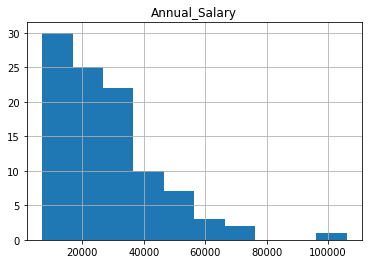

In [9]:
cust_salary.hist('Annual_Salary')

In [10]:
# Adding Salary to our unique customer dataset
customer_data=pd.merge(cust_data, cust_salary, on="customer_id")
customer_data.head()

,customer_id,balance,age,amount,salary,Annual_Salary
0,CUS-1005756958,2275.852055,53.0,222.862603,970.47,11645.64
1,CUS-1117979751,9829.929000,21.0,339.843700,3578.65,42943.80
2,CUS-1140341822,5699.212250,28.0,212.632500,1916.51,22998.12
3,CUS-1147642491,9032.841186,34.0,245.600169,1711.39,20536.68
4,CUS-1196156254,22272.433755,34.0,147.145796,3903.73,46844.76


### Observing correlation between various features and salary

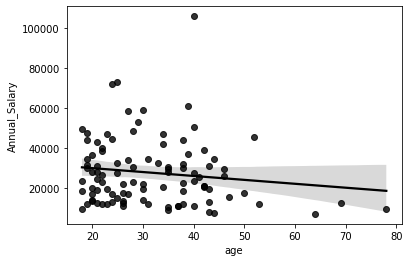

In [12]:
# Observing correlation between cutomer age and salary
sns.regplot("age", "Annual_Salary", data=customer_data,color = "black")

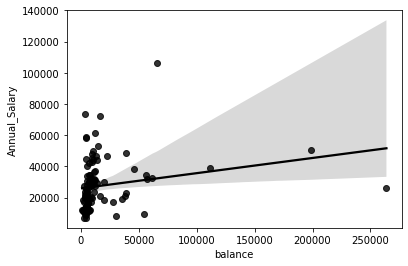

In [13]:
# Observing correlation between cutomer balance and salary
sns.regplot("balance", "Annual_Salary", data=customer_data,color = "black")

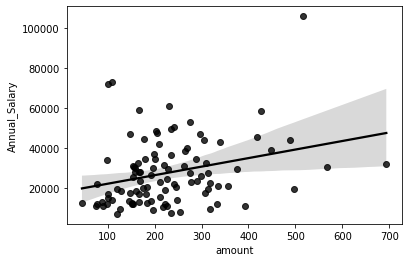

In [14]:
# Observing correlation between cutomer transaction amount and salary
sns.regplot("amount", "Annual_Salary", data=customer_data,color = "black")

### Extracting features

In [15]:
### Mean Spending/Payments by the customer
payment_data=data[data["txn_description"]=="PAYMENT"].groupby("customer_id").mean().reset_index()
payment_data=payment_data[["customer_id","amount"]]
payment_data=payment_data.rename(columns = {'amount':'payment'})
payment_data.head()

,customer_id,payment
0,CUS-1005756958,144.000000
1,CUS-1117979751,98.925000
2,CUS-1140341822,142.000000
3,CUS-1147642491,96.185185
4,CUS-1196156254,43.100000


### Preparing dataset for model building

In [16]:
## Merging Customer data with payment data 
Customer_Data = pd.merge(customer_data,payment_data, on = "customer_id")
Customer_Data.head()

,customer_id,balance,age,amount,salary,Annual_Salary,payment
0,CUS-1005756958,2275.852055,53.0,222.862603,970.47,11645.64,144.000000
1,CUS-1117979751,9829.929000,21.0,339.843700,3578.65,42943.80,98.925000
2,CUS-1140341822,5699.212250,28.0,212.632500,1916.51,22998.12,142.000000
3,CUS-1147642491,9032.841186,34.0,245.600169,1711.39,20536.68,96.185185
4,CUS-1196156254,22272.433755,34.0,147.145796,3903.73,46844.76,43.100000


In [18]:
# Separating independent features and target variable 
X=Customer_Data[["age","balance","payment"]].values
y=Customer_Data["Annual_Salary"].values

In [19]:
# Splitting our data 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

### Implementing Linear Regression Model

In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
print('Coefficient of determination for test data: ', r2_score(y_test, y_pred))
print('Root mean squared error for test data: ', mean_squared_error(y_test, y_pred, squared=False))

Coefficient of determination for test data:  0.025489206195759007
Root mean squared error for test data:  17648.31748807569


### Implementing Decision Tree Model

In [21]:
dt = DecisionTreeRegressor(max_depth = 2)
dt.fit(X_train, y_train)
y_pred_dt=dt.predict(X_test)
print('Root mean squared error for test data: ', mean_squared_error(y_test, y_pred_dt, squared=False))

Root mean squared error for test data:  15353.543065199558


### Testing our models

In [22]:
## For Linear Regression 
print("The linear regression model predicts salary will be=",lr.predict([[50,9000,140]])[0])

The linear regression model predicts salary will be= 20553.63973696397


In [23]:
## For Decision Tree
print("The dedcision tree model predicts salary will be=",dt.predict([[50,9000,140]])[0])

The dedcision tree model predicts salary will be= 22648.040000000005
